In [521]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [523]:
###column wise average/average per pixels

In [524]:
import pandas as pd

In [525]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [526]:
from sklearn.decomposition import PCA

In [527]:
from sklearn.manifold import TSNE

In [528]:
from sklearn.mixture import GaussianMixture

In [530]:
from sklearn.metrics.cluster import rand_score

In [531]:
from sklearn.metrics.cluster import adjusted_rand_score

In [532]:
from sklearn.decomposition import NMF

### In order to make this work easily readable, we will do full studies on the datasets separately

# Temperature dataset

In [533]:
temper = np.load(r"D:\Courses\Practical Machine Learning\temper.npz")

In [534]:
df = pd.DataFrame(temper['data'], columns = temper['varname'])

In [535]:
df.insert(0, 'villes', temper['villes'])

In [536]:
df

villes  January  February  March  April   May  June  July  \
0           Bordeaux      5.6       6.6   10.3   12.8  15.8  19.3  20.9   
1              Brest      6.1       5.8    7.8    9.2  11.6  14.4  15.6   
2   Clermont-Ferrand      2.6       3.7    7.5   10.3  13.8  17.3  19.4   
3           Grenoble      1.5       3.2    7.7   10.6  14.5  17.8  20.1   
4              Lille      2.4       2.9    6.0    8.9  12.4  15.3  17.1   
5               Lyon      2.1       3.3    7.7   10.9  14.9  18.5  20.7   
6          Marseille      5.5       6.6   10.0   13.0  16.8  20.8  23.3   
7        Montpellier      5.6       6.7    9.9   12.8  16.2  20.1  22.7   
8             Nantes      5.0       5.3    8.4   10.8  13.9  17.2  18.8   
9               Nice      7.5       8.5   10.8   13.3  16.7  20.1  22.7   
10             Paris      3.4       4.1    7.6   10.7  14.3  17.5  19.1   
11            Rennes      4.8       5.3    7.9   10.1  13.1  16.2  17.9   
12        Strasbourg      0.4       1.5    5.6    9.8  14.0  17.2  19.0   
13          Toulouse      4.7       5.6    9.2   11.6  14.9  18.7  20.9   
14             Vichy      2.4       3.4    7.1    9.9  13.6  17.1  19.3   

    August  September  October  November  December  Latitude  Longitude  
0     21.0       18.6     13.8       9.1       6.2      44.5      -0.34  
1     16.0       14.7     12.0       9.0       7.0      48.2      -4.29  
2     19.1       16.2     11.2       6.6       3.6      45.5       3.05  
3     19.5       16.7     11.4       6.5       2.3      45.1       5.43  
4     17.1       14.7     10.4       6.1       3.5      50.4       3.04  
5     20.1       16.9     11.4       6.7       3.1      45.5       4.51  
6     22.8       19.9     15.0      10.2       6.9      43.2       5.24  
7     22.3       19.3     14.6      10.0       6.5      43.4       3.53  
8     18.6       16.4     12.2       8.2       5.5      47.1      -1.33  
9     22.5       20.3     16.0      11.5       8.2      43.4       7.15  
10    18.7       16.0     11.4       7.1       4.3      48.5       2.20  
11    17.8       15.7     11.6       7.8       5.4      48.1      -1.41  
12    18.3       15.1      9.5       4.9       1.3      48.4       7.45  
13    20.9       18.3     13.3       8.6       5.5      43.4       1.26  
14    18.8       16.0     11.0       6.6       3.4      46.1       3.26

In [537]:
df.describe(include = 'all')

villes    January   February      March     April        May  \
count           15  15.000000  15.000000  15.000000  15.00000  15.000000   
unique          15        NaN        NaN        NaN       NaN        NaN   
top     Strasbourg        NaN        NaN        NaN       NaN        NaN   
freq             1        NaN        NaN        NaN       NaN        NaN   
mean           NaN   3.973333   4.833333   8.233333  10.98000  14.433333   
std            NaN   2.007296   1.868409   1.529083   1.41482   1.504596   
min            NaN   0.400000   1.500000   5.600000   8.90000  11.600000   
25%            NaN   2.400000   3.350000   7.550000  10.00000  13.700000   
50%            NaN   4.700000   5.300000   7.800000  10.70000  14.300000   
75%            NaN   5.550000   6.200000   9.550000  12.20000  15.350000   
max            NaN   7.500000   8.500000  10.800000  13.30000  16.800000   

             June       July     August  September    October   November  \
count   15.000000  15.000000  15.000000  15.000000  15.000000  15.000000   
unique        NaN        NaN        NaN        NaN        NaN        NaN   
top           NaN        NaN        NaN        NaN        NaN        NaN   
freq          NaN        NaN        NaN        NaN        NaN        NaN   
mean    17.833333  19.833333  19.566667  16.986667  12.320000   7.926667   
std      1.793507   2.128939   2.011988   1.848114   1.829988   1.803753   
min     14.400000  15.600000  16.000000  14.700000   9.500000   4.900000   
25%     17.150000  18.900000  18.450000  15.850000  11.300000   6.600000   
50%     17.500000  19.400000  19.100000  16.400000  11.600000   7.800000   
75%     19.000000  20.900000  20.950000  18.450000  13.550000   9.050000   
max     20.800000  23.300000  22.800000  20.300000  16.000000  11.500000   

         December   Latitude  Longitude  
count   15.000000  15.000000  15.000000  
unique        NaN        NaN        NaN  
top           NaN        NaN        NaN  
freq          NaN        NaN        NaN  
mean     4.846667  46.053333   2.583333  
std      1.958449   2.290935   3.318136  
min      1.300000  43.200000  -4.290000  
25%      3.450000  43.950000   0.460000  
50%      5.400000  45.500000   3.050000  
75%      6.350000  48.150000   4.875000  
max      8.200000  50.400000   7.450000

In [538]:
df_copy = df.copy()

In [539]:
df.pop('Latitude')
df.pop('Longitude')

0    -0.34
1    -4.29
2     3.05
3     5.43
4     3.04
5     4.51
6     5.24
7     3.53
8    -1.33
9     7.15
10    2.20
11   -1.41
12    7.45
13    1.26
14    3.26
Name: Longitude, dtype: float64

In [540]:
df.pop('villes')

0             Bordeaux
1                Brest
2     Clermont-Ferrand
3             Grenoble
4                Lille
5                 Lyon
6            Marseille
7          Montpellier
8               Nantes
9                 Nice
10               Paris
11              Rennes
12          Strasbourg
13            Toulouse
14               Vichy
Name: villes, dtype: object

In [541]:
len(df.columns)

12

### We visualize the mean

In [542]:
moy = []
for i in df.columns:
    moy.append(np.mean(df[i]))

### We can see that in average, the temperature is really high in June, and low down in December and January

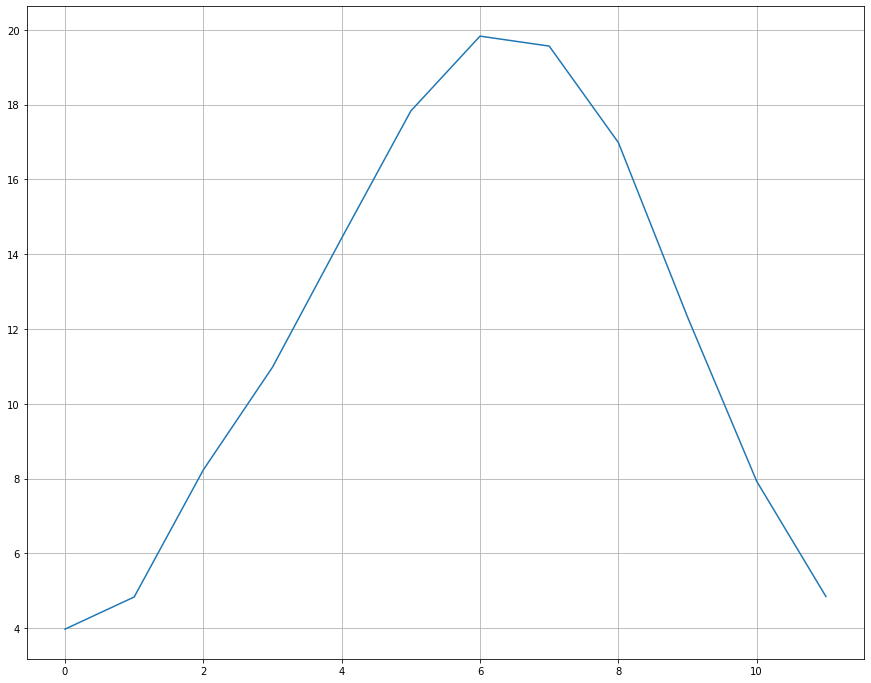

In [543]:
plt.figure(figsize = (15, 12))
plt.plot(np.arange(12), moy)
plt.grid()

### We reproduce the figures

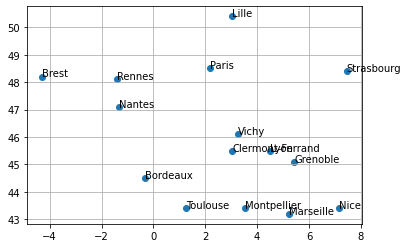

In [544]:
fig, ax = plt.subplots()
ax.scatter(df_copy['Longitude'], df_copy['Latitude'])
ax.grid()

for i, txt in enumerate(df_copy['villes']):
    ax.annotate(txt, (df_copy['Longitude'][i], df_copy['Latitude'][i]))

#### Marseille is the hottest city around june while Strasbourg is the coldest around December and January.  

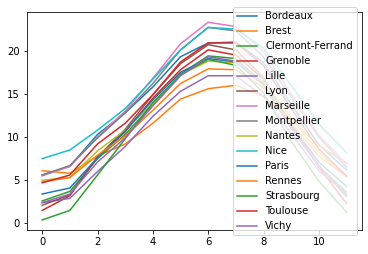

In [545]:
x = np.arange(0, 12)
for i in range(len(df_copy['villes'])):
    plt.plot(x, temper['data'][i][:-2], label = df_copy['villes'][i])
    
plt.legend(loc= "right")

### KMeans clustering

### 2.1/

## K = 3

In [546]:
kmeanModel = KMeans(n_clusters=3)
model = kmeanModel.fit(df)

In [547]:
centers = model.cluster_centers_
centers

array([[ 2.11428571,  3.15714286,  7.02857143, 10.15714286, 13.92857143,
        17.24285714, 19.24285714, 18.8       , 15.94285714, 10.9       ,
         6.35714286,  3.07142857],
       [ 5.78      ,  6.8       , 10.04      , 12.7       , 16.08      ,
        19.8       , 22.1       , 21.9       , 19.28      , 14.54      ,
         9.88      ,  6.66      ],
       [ 5.3       ,  5.46666667,  8.03333333, 10.03333333, 12.86666667,
        15.93333333, 17.43333333, 17.46666667, 15.6       , 11.93333333,
         8.33333333,  5.96666667]])

#### The cities are clustered by their geographical positions. The hottest cities will be in cluster 1, and the coldest one will be in cluster 0 and 2. But we can see that clusters 0 and 2 intersect each other and are almost at the same level, that probably means that cities in both are not far from one another and can be regrouped in the same cluster. A think could be that we have have a centroid for the North(coldest cities) and one for the south(Hottest cities), and if you don't know nothing about the geographu, maybe you could think that an "extra" cluster could either just create useless class, or add more specifications like North-East, South-West, etc...

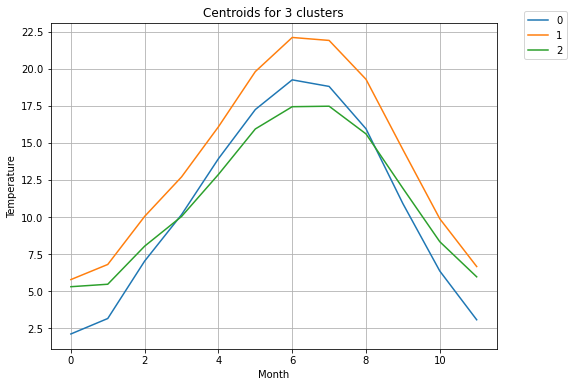

In [548]:
plt.figure(figsize = (8, 6))
for i in range(3):
    plt.plot(np.arange(12), centers[i])
plt.legend(np.unique(model.labels_), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.title('Centroids for 3 clusters')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

#### Other values of K

#### Let's study the case K=2

In [549]:
kmeanModel = KMeans(n_clusters=2)
model = kmeanModel.fit(df)

In [550]:
centers = model.cluster_centers_
centers

array([[ 3.07,  3.85,  7.33, 10.12, 13.61, 16.85, 18.7 , 18.4 , 15.84,
        11.21,  6.95,  3.94],
       [ 5.78,  6.8 , 10.04, 12.7 , 16.08, 19.8 , 22.1 , 21.9 , 19.28,
        14.54,  9.88,  6.66]])

#### Here, it's more clear. The centroids do not intersect each other and the cities are clustered by their geographical positions. 

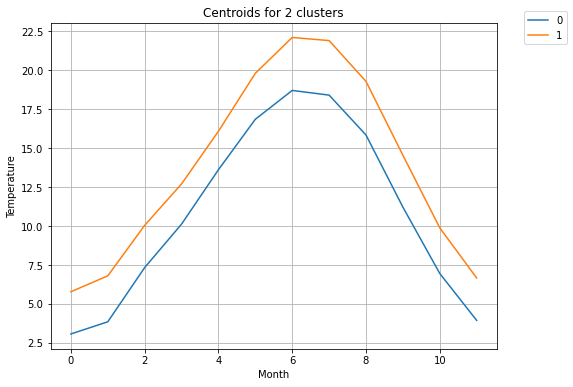

In [551]:
plt.figure(figsize = (8, 6))
for i in range(2):
    plt.plot(np.arange(12), centers[i])
plt.legend(np.unique(model.labels_), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.title('Centroids for 2 clusters')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

#### We end with K = 4

In [552]:
kmeanModel = KMeans(n_clusters=4)
model = kmeanModel.fit(df)

In [553]:
centers = model.cluster_centers_
centers

array([[ 1.4       ,  2.2       ,  5.8       ,  9.35      , 13.2       ,
        16.25      , 18.05      , 17.7       , 14.9       ,  9.95      ,
         5.5       ,  2.4       ],
       [ 5.78      ,  6.8       , 10.04      , 12.7       , 16.08      ,
        19.8       , 22.1       , 21.9       , 19.28      , 14.54      ,
         9.88      ,  6.66      ],
       [ 2.4       ,  3.54      ,  7.52      , 10.48      , 14.22      ,
        17.64      , 19.72      , 19.24      , 16.36      , 11.28      ,
         6.7       ,  3.34      ],
       [ 5.3       ,  5.46666667,  8.03333333, 10.03333333, 12.86666667,
        15.93333333, 17.43333333, 17.46666667, 15.6       , 11.93333333,
         8.33333333,  5.96666667]])

#### Herew we clearly have extra clusters. The green and the blue curves are almost the same, which means that cities belonging normally to the same clusters have been separeted from one another. So, we are not really sure about whether 2 or 3 is the ideal number of clusters, but it's clear that going beyond 3 clusters is useless

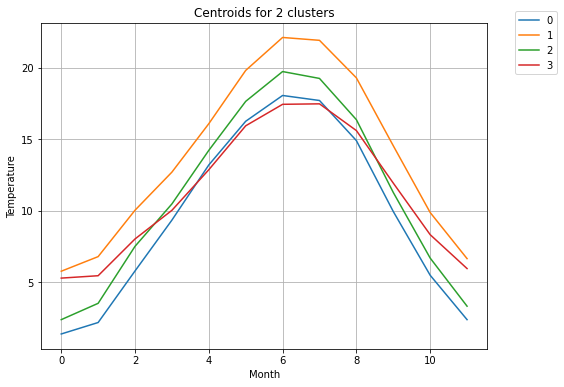

In [554]:
plt.figure(figsize = (8, 6))
for i in range(4):
    plt.plot(np.arange(12), centers[i])
plt.legend(np.unique(model.labels_), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.title('Centroids for 2 clusters')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

### 2.2/

#### For the case K = 2

In [555]:
kmeanModel = KMeans(n_clusters=2)
model = kmeanModel.fit(df)
df_copy['k_means2']=model.predict(df)

#### The clustering make sens and confirm the hypothesis of geographical classification. We can see that North and center cities belong to the same class, whie South cities belong to the other class. That's kind of normal, since cities in the same region tend to have the "same" temperature. But it can a mistake to put North and Center cities in the same class. Let study the case K = 3 to see how the clustering performs. 

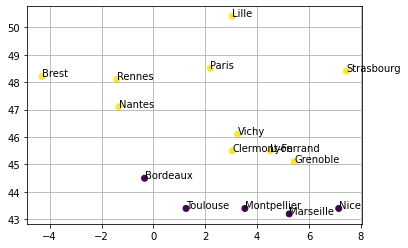

In [556]:
fig, ax = plt.subplots()
ax.scatter(df_copy['Longitude'], df_copy['Latitude'], c = df_copy['k_means2'])
ax.grid()

for i, txt in enumerate(df_copy['villes']):
    ax.annotate(txt, (df_copy['Longitude'][i], df_copy['Latitude'][i]))

#### For the case K = 3

In [557]:
kmeanModel = KMeans(n_clusters=3)
model = kmeanModel.fit(df)
df_copy['k_means3']=model.predict(df)

#### This one is kind of tough to tell. We can say that the clustering has well performed since Brest, Rennes and Nantes are near the cost. But since i don't know France geography very well, it's a little bit diffcult to tell why Paris and which seem to be in the North Central are in the same cluster with Grenoble, Lyon, etc... which seem to be more in the South East side. 

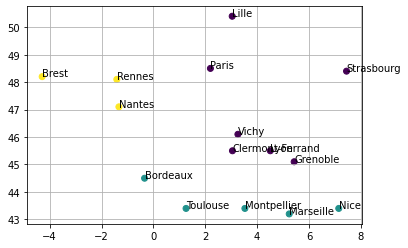

In [558]:
fig, ax = plt.subplots()
ax.scatter(df_copy['Longitude'], df_copy['Latitude'], c = df_copy['k_means3'])
ax.grid()

for i, txt in enumerate(df_copy['villes']):
    ax.annotate(txt, (df_copy['Longitude'][i], df_copy['Latitude'][i]))

#### 3./ Density Estimation( K=2)

In [559]:
gaussian_temper = GaussianMixture(n_components = 2, covariance_type = 'diag').fit(df)

In [560]:
df_copy['GMM2'] = gaussian_temper.predict(df)

In [561]:
centers = gaussian_temper.means_

#### We have the same as obtained using the Kmeans clustering. The interpretation should therefore be the same. The samples are clustered by the geographical positions of the cities 

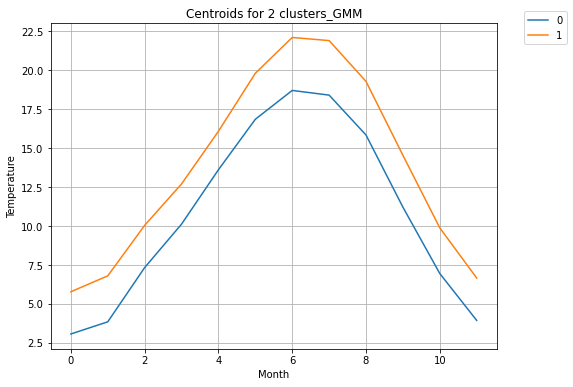

In [562]:
plt.figure(figsize = (8, 6))
for i in range(2):
    plt.plot(np.arange(12), centers[i])
plt.legend(np.unique(list(df_copy['GMM2'])), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.title('Centroids for 2 clusters_GMM')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

### Density Estimation K=3

In [563]:
gaussian_temper = GaussianMixture(n_components = 3, covariance_type = 'diag').fit(df)
df_copy['GMM3'] = gaussian_temper.predict(df)

In [564]:
centers = gaussian_temper.means_

In [565]:
centers

array([[ 5.78      ,  6.8       , 10.04      , 12.7       , 16.08      ,
        19.8       , 22.1       , 21.9       , 19.28      , 14.54      ,
         9.88      ,  6.66      ],
       [ 2.11428573,  3.15714287,  7.02857143, 10.15714286, 13.92857143,
        17.24285714, 19.24285714, 18.8       , 15.94285714, 10.90000001,
         6.35714287,  3.07142858],
       [ 5.3       ,  5.46666667,  8.03333333, 10.03333333, 12.86666666,
        15.93333332, 17.43333332, 17.46666666, 15.59999999, 11.93333333,
         8.33333334,  5.96666667]])

#### Here also, we obtain the same curves as presented in the Kmeans clustering for K = 3

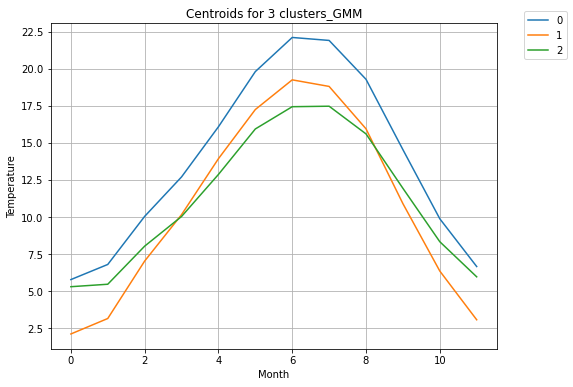

In [566]:
plt.figure(figsize = (8, 6))
for i in range(3):
    plt.plot(np.arange(12), centers[i])
plt.legend(np.unique(list(df_copy['GMM3'])), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.title('Centroids for 3 clusters_GMM')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.grid()

#### We change the shape of the covariance

#### $\star $  Spherical

In [567]:
gaussian_temper = GaussianMixture(n_components = 2, covariance_type = 'spherical').fit(df)
df_copy['GMM_sphe'] = gaussian_temper.predict(df)

In [568]:
centers = gaussian_temper.means_

#### Tied

In [569]:
gaussian_temper = GaussianMixture(n_components = 2, covariance_type = 'tied').fit(df)
df_copy['GMM_tied'] = gaussian_temper.predict(df)

#### Full

In [570]:
gaussian_temper = GaussianMixture(n_components = 2, covariance_type = 'full').fit(X)
df_copy['GMM_full'] = gaussian_temper.predict(X)

#### Using "Full", "tied" predicted exactly the same results as "diag", while using "spherical" predicted the opposite. 

In [571]:
df_copy

villes  January  February  March  April   May  June  July  \
0           Bordeaux      5.6       6.6   10.3   12.8  15.8  19.3  20.9   
1              Brest      6.1       5.8    7.8    9.2  11.6  14.4  15.6   
2   Clermont-Ferrand      2.6       3.7    7.5   10.3  13.8  17.3  19.4   
3           Grenoble      1.5       3.2    7.7   10.6  14.5  17.8  20.1   
4              Lille      2.4       2.9    6.0    8.9  12.4  15.3  17.1   
5               Lyon      2.1       3.3    7.7   10.9  14.9  18.5  20.7   
6          Marseille      5.5       6.6   10.0   13.0  16.8  20.8  23.3   
7        Montpellier      5.6       6.7    9.9   12.8  16.2  20.1  22.7   
8             Nantes      5.0       5.3    8.4   10.8  13.9  17.2  18.8   
9               Nice      7.5       8.5   10.8   13.3  16.7  20.1  22.7   
10             Paris      3.4       4.1    7.6   10.7  14.3  17.5  19.1   
11            Rennes      4.8       5.3    7.9   10.1  13.1  16.2  17.9   
12        Strasbourg      0.4       1.5    5.6    9.8  14.0  17.2  19.0   
13          Toulouse      4.7       5.6    9.2   11.6  14.9  18.7  20.9   
14             Vichy      2.4       3.4    7.1    9.9  13.6  17.1  19.3   

    August  September  ...  December  Latitude  Longitude  k_means2  k_means3  \
0     21.0       18.6  ...       6.2      44.5      -0.34         0         1   
1     16.0       14.7  ...       7.0      48.2      -4.29         1         2   
2     19.1       16.2  ...       3.6      45.5       3.05         1         0   
3     19.5       16.7  ...       2.3      45.1       5.43         1         0   
4     17.1       14.7  ...       3.5      50.4       3.04         1         0   
5     20.1       16.9  ...       3.1      45.5       4.51         1         0   
6     22.8       19.9  ...       6.9      43.2       5.24         0         1   
7     22.3       19.3  ...       6.5      43.4       3.53         0         1   
8     18.6       16.4  ...       5.5      47.1      -1.33         1         2   
9     22.5       20.3  ...       8.2      43.4       7.15         0         1   
10    18.7       16.0  ...       4.3      48.5       2.20         1         0   
11    17.8       15.7  ...       5.4      48.1      -1.41         1         2   
12    18.3       15.1  ...       1.3      48.4       7.45         1         0   
13    20.9       18.3  ...       5.5      43.4       1.26         0         1   
14    18.8       16.0  ...       3.4      46.1       3.26         1         0   

    GMM2  GMM3  GMM_sphe  GMM_tied  GMM_full  
0      1     0         0         0         1  
1      0     2         1         1         0  
2      0     1         1         1         0  
3      0     1         1         1         0  
4      0     1         1         1         0  
5      0     1         1         1         0  
6      1     0         0         0         1  
7      1     0         0         0         1  
8      0     2         1         1         0  
9      1     0         0         0         1  
10     0     1         1         1         0  
11     0     2         1         1         0  
12     0     1         1         1         0  
13     1     0         0         0         1  
14     0     1         1         1         0  

[15 rows x 22 columns]

#### Log probability

In [572]:
gaussian_temper = GaussianMixture(n_components = 2, covariance_type = 'diag').fit(df)
##predict_temper = gaussian_temper.predict(X)

In [573]:
p = gaussian_temper.score_samples(df)       ##probability of samples
p

array([-12.43200276, -30.66152562, -12.74903446, -16.06967722,
       -20.62541895, -18.44314441, -13.02102214,  -9.92980207,
       -17.20816322, -20.24013377, -13.12603521, -14.98650196,
       -23.88056866, -21.49078828, -12.63133605])

In [574]:
p = np.exp(p)    ###probabilities
p

array([3.98886927e-06, 4.82912689e-14, 2.90512407e-06, 1.04960975e-07,
       1.10279391e-09, 9.77786764e-09, 2.21330841e-06, 4.87014345e-05,
       3.36193777e-08, 1.62114398e-09, 1.99266980e-06, 3.10059395e-07,
       4.25403251e-11, 4.64161630e-10, 3.26798800e-06])

#### We plot the samples with the smallest scores(Outliers)

In [575]:
idx = np.argpartition(p, 6)
### we take the 3 with the smallest score
t = 4
idx[:t]

array([ 1, 12, 13,  9], dtype=int64)

#### We can see that outliers are cities located at the frontiers

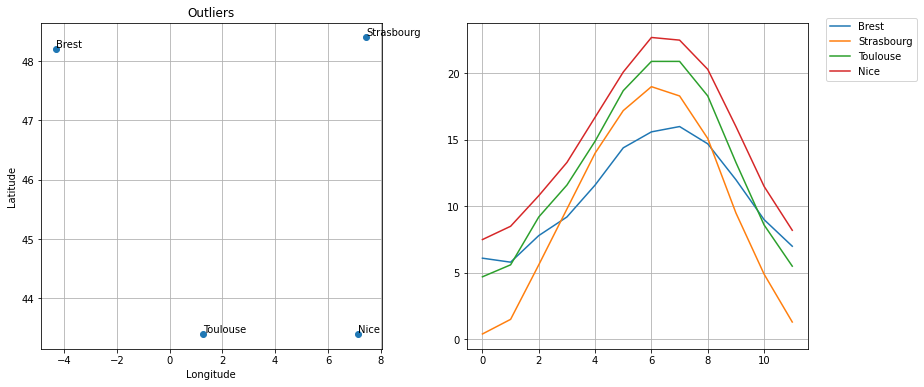

In [576]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.25
                   )

ax[0].scatter(df_copy['Longitude'][idx[:t]], df_copy['Latitude'][idx[:t]])
ax[0].set(xlabel = "Longitude", ylabel = "Latitude", title = "Outliers")
for i in idx[:t]: 
    ax[0].text(df_copy['Longitude'][i], df_copy['Latitude'][i], df_copy['villes'][i], ha = 'left', va = 'bottom')

ax[0].grid()

ax[1].plot(np.array(df)[idx[:t], :].T)
ax[1].plot(xlabel = "Month", ylabel = "Temperature", title = "Outliers")
ax[1].legend(df_copy['villes'][idx],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))
ax[1].grid()


#### We generate samples from the distribution

In [577]:
gaussian_temper = GaussianMixture(n_components = 2, covariance_type = 'diag').fit(df)

In [578]:
generated = gaussian_temper.sample(15)

#### Even though in general we can see that the generated data try to follow the same curve as the real data, it's quite easy to differentiate them. 

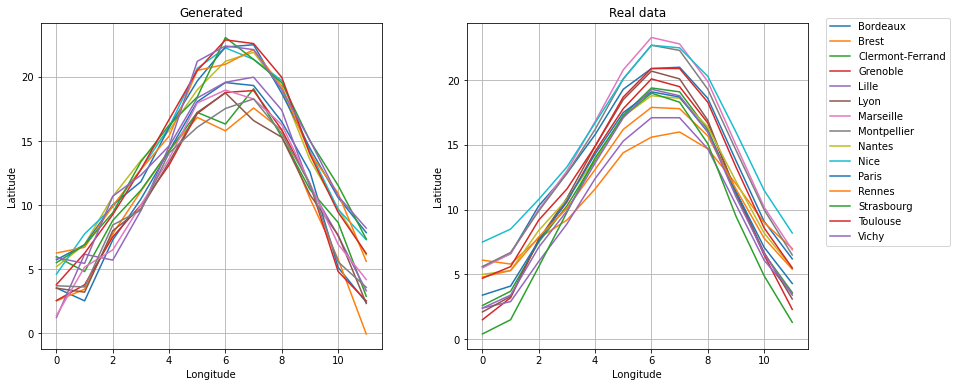

In [579]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.25)

ax[0].set(xlabel = "Longitude", ylabel = "Latitude", title = "Generated")
for i in range(15): 
    ax[0].plot(np.arange(12), generated[0][i])
ax[1].legend(df_copy['villes'],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))

ax[0].grid()

ax[1].set(xlabel = "Longitude", ylabel = "Latitude", title = "Real data")
for i in range(15): 
    ax[1].plot(np.arange(12), np.array(df)[i])
ax[1].legend(df_copy['villes'],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))
ax[1].grid()

## Dimensionality reduction

### Linear Projection : PCA

#### Covariance matrix

In [580]:
X = np.array(df)

#### when looking at the covariance matrix, we can see different "concentrations" of relations between months. For example, October, November,.....,February seem to be correlated, while April, May, June,July and August seem to be related. We can then deduce the different seasons( Winter,  Summer) from the covariance matrix. 

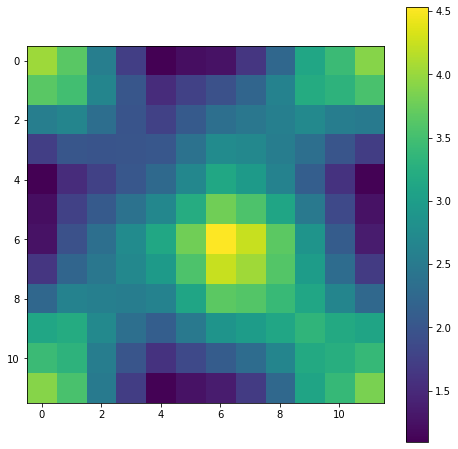

In [581]:
plt.figure(figsize = (8, 8))
plt.imshow(np.cov(X.T))
plt.colorbar()
plt.show()

#### PCA

In [582]:
pca = PCA(n_components=None).fit(X)

In [583]:
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[7.83110305e-01 2.06569899e-01 4.84535068e-03 2.79489336e-03
 1.14488366e-03 6.57394899e-04 5.57874105e-04 1.40975158e-04
 1.10823960e-04 4.29735573e-05 2.29442453e-05 1.68278390e-06]


#### So basically here, by taking the first two components, we can keep about 98% of the information. 

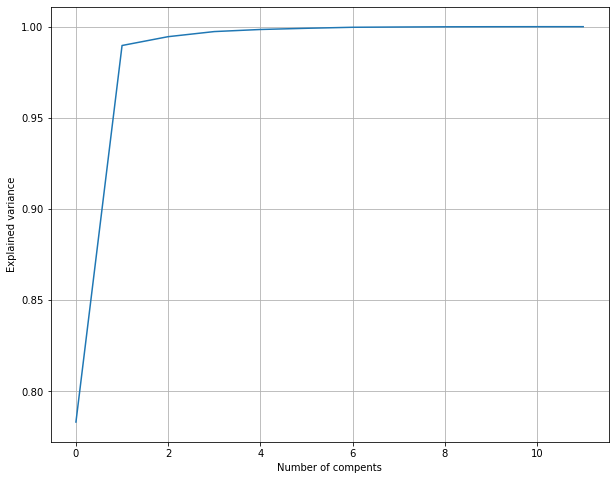

In [584]:
plt.figure(figsize = (10, 8))
x = np.arange(len(variance_ratio))
plt.plot(x, variance_ratio.cumsum())
plt.xlabel("Number of compents")
plt.ylabel("Explained variance")
plt.grid()

#### Projection in 2-D

In [585]:
transform = pca.transform(X)

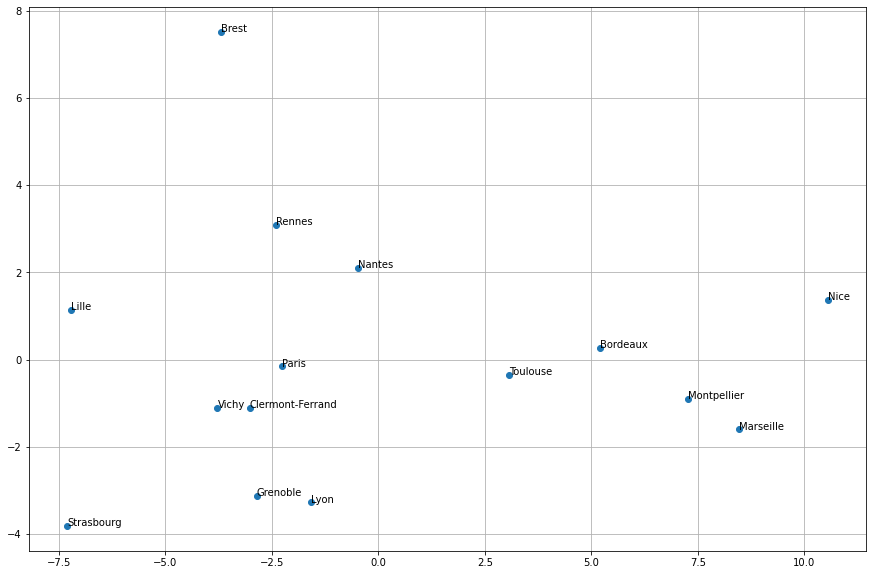

In [586]:
plt.figure(figsize = (15, 10))
plt.scatter(transform[:,0], transform[:,1])
for i in range(15):
    plt.text(transform[:,0][i], transform[:,1][i], np.array(df_copy['villes'])[i])
plt.grid()

#### We plot the first two princal components

In [587]:
pca = PCA(n_components = 2).fit(X)
components = pca.components_
components

array([[ 0.27765046,  0.29726177,  0.26549892,  0.24426184,  0.23276055,
         0.27461466,  0.31796069,  0.32160147,  0.32149157,  0.32257588,
         0.2946594 ,  0.27575128],
       [ 0.44271144,  0.29596995,  0.07437784, -0.10733591, -0.25565325,
        -0.3209949 , -0.40635887, -0.31355378, -0.1457905 ,  0.09718023,
         0.25000485,  0.41750952]])

#### We can see that the first principal component is always positively correlated with the features(months), which means it's a parameter related to all the features. More like a "regression axis" and not a "classification axis". It was still kind of difficult or me to see exactly what it represented. So i looked at the previous figure, and get that we were going from average cold city to average hot city. So that axis clearly represent the Temperature. Since, the signification of the axis is related to the cities, i'm still asking myself how we can interpret it on the figure below without plotting the cities. 
#### The second parameter is easy to interprete. We have a strong correlation in December and January, which stay positive until April(Winter) and a negative correlation starting from April to September(Summer). So the y-axis expresses the seasonality

### First component + Second component = Temperature + Seasonality

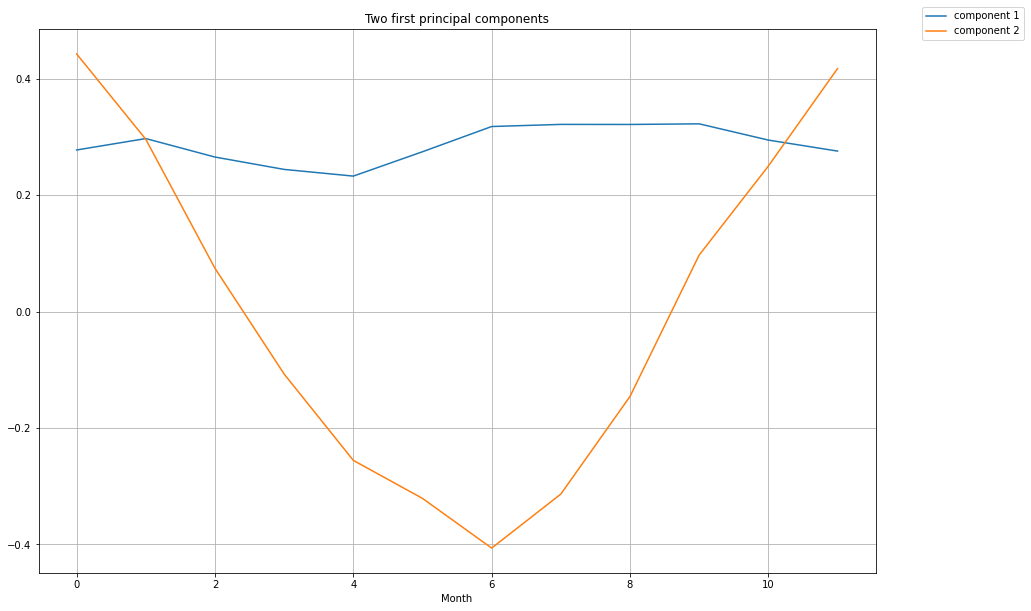

In [588]:
plt.figure(figsize = (15, 10))
for i in range(2):
    plt.plot(np.arange(12), components[i])
plt.legend((['component 1', 'component 2']), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.title('Two first principal components')
plt.xlabel('Month')
plt.grid()

### Data reconstrucion

#### for p = 2

In [589]:
pca = PCA(n_components = 2)
projected = pca.fit_transform(X)

In [590]:
reconstruct = pca.inverse_transform(projected)
#reconstruct

#### We plot the reconstructed. We choose 5 cities. The reconstructed samples look practically the same as the original. Without even taking another values of p, we can say that it won't have a big impact( at least have a impact so big that we need to add one dimension), since we already had about 98% of the information in two dimensions. 

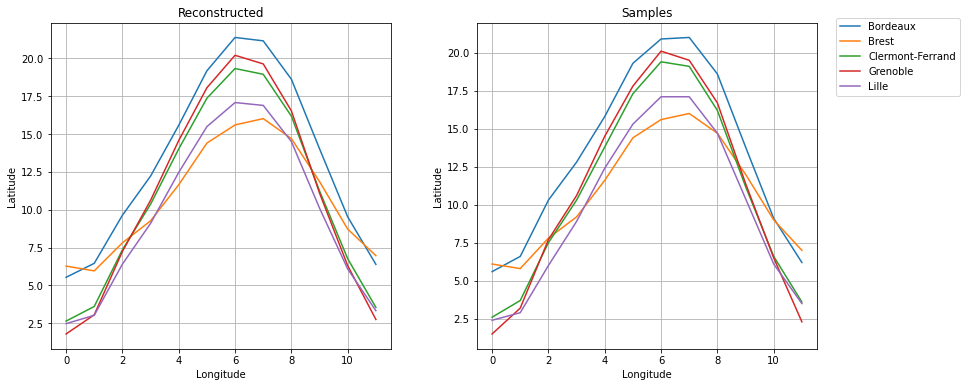

In [591]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.25)

ax[0].set(xlabel = "Longitude", ylabel = "Latitude", title = "Reconstructed")
for i in range(5): 
    ax[0].plot(np.arange(12), reconstruct[i])
ax[1].legend(df_copy['villes'],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))

ax[0].grid()

ax[1].set(xlabel = "Longitude", ylabel = "Latitude", title = "Samples")
for i in range(5): 
    ax[1].plot(np.arange(12), X[i])
ax[1].legend(df_copy['villes'],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))
ax[1].grid()

#### Bonus : NMF Method

#### We have the same reconstruction as the pca for 2 components, which is very close to the original. 

In [734]:
model_nmf = NMF(n_components=2, init = 'random')

In [735]:
transform_nmf = model_nmf.fit_transform(X)

In [731]:
reconstruct_nmf = model_nmf.inverse_transform(transform_nmf)

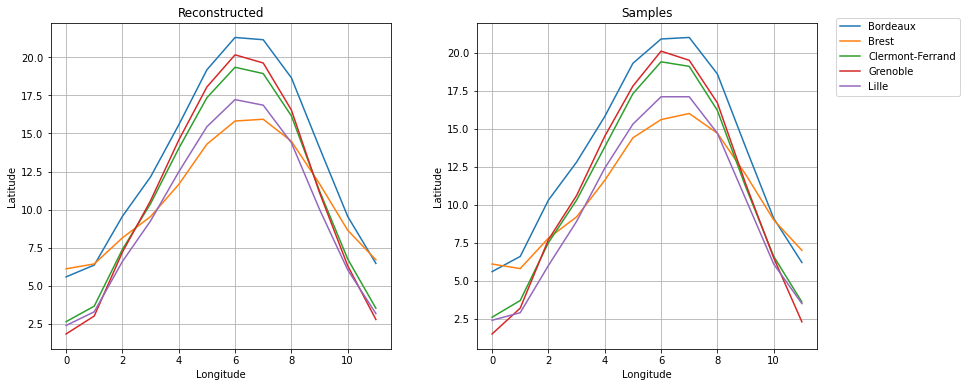

In [728]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.25)

ax[0].set(xlabel = "Longitude", ylabel = "Latitude", title = "Reconstructed")
for i in range(5): 
    ax[0].plot(np.arange(12), reconstruct_nmf[i])
ax[1].legend(df_copy['villes'],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))

ax[0].grid()

ax[1].set(xlabel = "Longitude", ylabel = "Latitude", title = "Samples")
for i in range(5): 
    ax[1].plot(np.arange(12), X[i])
ax[1].legend(df_copy['villes'],  loc = "upper left", bbox_to_anchor = (1.04, 1.03))
ax[1].grid()

### Manifold Learning : TSNE

#### Here we recover the geographical realtions, going from the south to the North. For a smaller perplexity, the relation stay but the positions of the samples change. 

In [592]:
manifold = TSNE(n_components = 2).fit_transform(X)

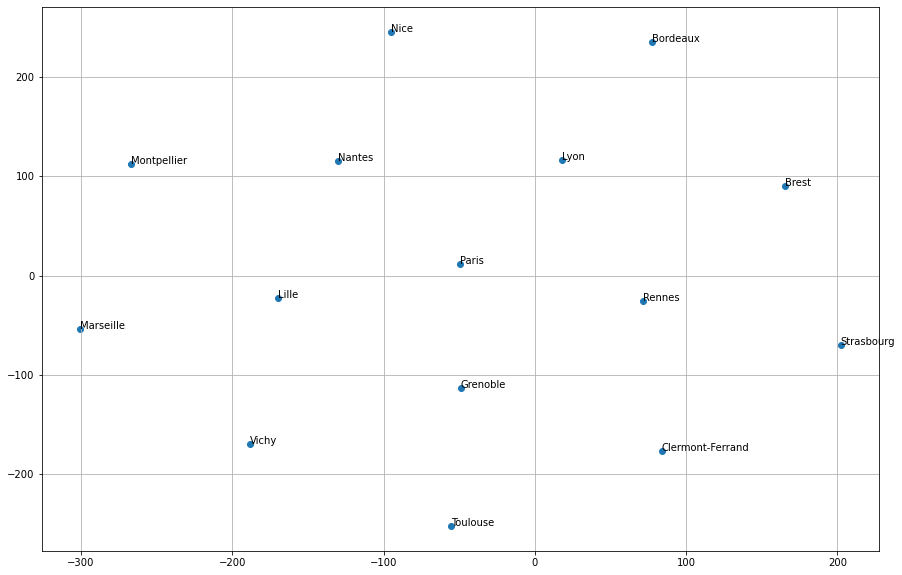

In [593]:
plt.figure(figsize = (15, 10))
plt.scatter(manifold[:,0], manifold[:,1])
for i in range(15):
    plt.text(manifold[:,0][i], manifold[:,1][i], np.array(df_copy['villes'])[i])
plt.grid()

In [736]:
manifold = TSNE(n_components = 2, perplexity = 10.0).fit_transform(X)

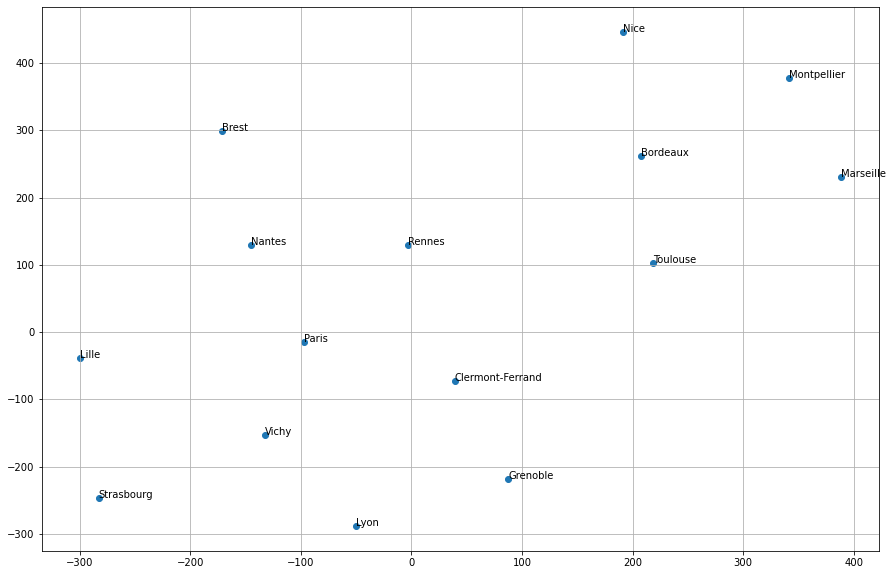

In [737]:
plt.figure(figsize = (15, 10))
plt.scatter(manifold[:,0], manifold[:,1])
for i in range(15):
    plt.text(manifold[:,0][i], manifold[:,1][i], np.array(df_copy['villes'])[i])
plt.grid()

# Digits dataset

In [596]:
digits = np.load(r"D:\Courses\Practical Machine Learning\digits.npz")

In [597]:
x_digits = digits["x"]
x_digits_train = digits["xt"]
y_digits = digits["y"]
y_digits_train = digits["yt"]

In [598]:
x_digits = np.concatenate((x_digits, x_digits_train))

In [599]:
y_digits = np.concatenate((y_digits, y_digits_train))

In [600]:
x_digits = x_digits / 255

### We visualize the mean

#### Looks like the three numbers(1, 7 and 8) have been plotted in one single image. 

(-0.5, 27.5, 27.5, -0.5)

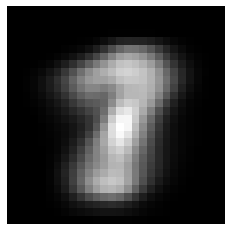

In [601]:
moy = []
for i in range(len(x_digits.T)):
    moy.append(np.mean(x_digits[:,i]))
moy = np.asarray(moy)
plt.imshow(moy.reshape(28, 28), cmap = 'gray')
plt.axis('off')

#### We reproduce the data

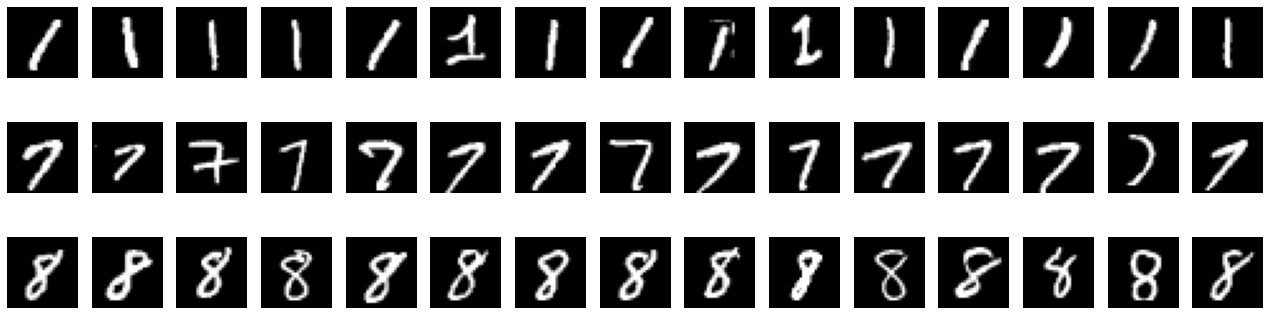

In [602]:
liste = np.arange(list(y_digits).index(1), list(y_digits).index(1) + 15).tolist() + np.arange(list(y_digits).index(7), list(y_digits).index(7) + 15).tolist() + np.arange(list(y_digits).index(8), list(y_digits).index(8) + 15).tolist()
rows = 3
columns = 15
fig = plt.figure(figsize=(1.5*columns,2*rows))
j = 1
for i in liste:
    fig.add_subplot(rows, columns, j)
    plt.imshow(x_digits[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    j += 1

### Clustering


### KMeans clustering

In [603]:
kmeanModel = KMeans(n_clusters=3)
model_principal = kmeanModel.fit(x_digits)

In [604]:
centroids = centers = model_principal.cluster_centers_
centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Plotting the centroids

#### Here, it's clear that the samples have been clustered by their class. The centroid(clearly readable) represent the three classes 1, 7 and 8. 

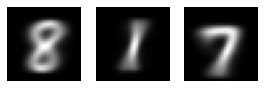

In [605]:
rows = 1
columns = 3
fig = plt.figure(figsize=(1.5*columns,2*rows))
for i in range(len(centroids)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centroids[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

### For different values of K

#### K = 2

In [606]:
kmeanModel = KMeans(n_clusters=2)
model_k2 = kmeanModel.fit(x_digits)

In [607]:
centroids = centers = model_k2.cluster_centers_
centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### This clustering did not perform well. We can slightly distinguish one centroid(7, assuming that all the samples belonging to that class have been well clustered), but the other centroid is not clear. The clustering tried to combined  two classes. And even if we didn't have access to the labels, it would've been obvious after performing the Kmeans for 3 clusters, that 2 clusters isn't the ideal choice 

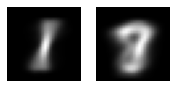

In [608]:
rows = 1
columns = 3
fig = plt.figure(figsize=(1.5*columns,2*rows))
for i in range(len(centroids)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centroids[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

#### K = 4

In [609]:
kmeanModel = KMeans(n_clusters=4)
model_k4 = kmeanModel.fit(x_digits)

In [610]:
centroids = centers = model_k4.cluster_centers_
centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Here, we have the "opposite" of the one with 2 clusters. The clustering created a useless centroid to separate samples which normally belong to the same class. 

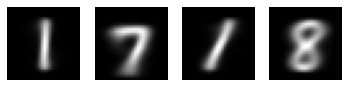

In [611]:
rows = 1
columns = 4
fig = plt.figure(figsize=(1.5*columns,2*rows))
for i in range(len(centroids)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centroids[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

### 2.3/

#### 1/ The centroid is the most representative point of the cluster,  sp it should resemble a true image from the dataset. 

#### 2/ Predicted Labels

In [612]:
pred = model_principal.predict(x_digits)

In [613]:
pred_modif = []
for i in range(len(pred)):
    if pred[i] == 0:
        pred_modif.append(3)
    else:
        pred_modif.append(pred[i])

#### The clustering performed well, though there are some points which have been wrong classified. 

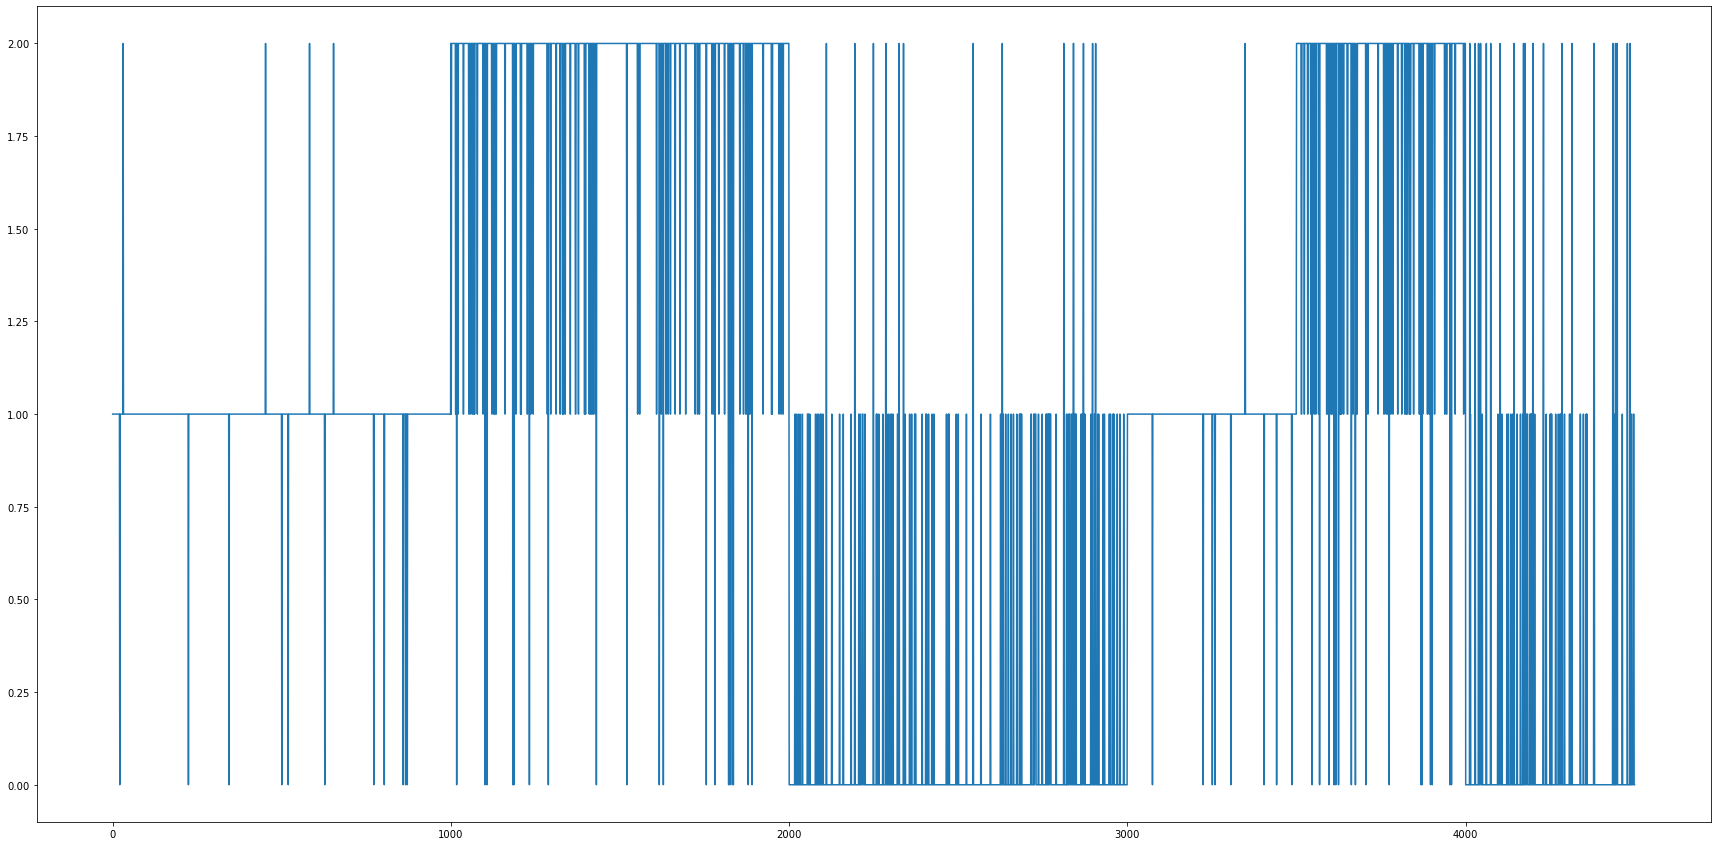

In [614]:
plt.figure(figsize = (30, 15))
x = np.arange(len(x_digits))
plt.plot(x, pred)

#### for K = 3

In [615]:
y_digits_list = []
pred_list = []
for i in range(len(y_digits)):
    y_digits_list.append(y_digits[i][0])
    pred_list.append(pred[i])

#### We have a good score and a good adjusted score in thsi case( which is normal since we actually have 3 classes)

In [616]:
score = rand_score(pred_list, y_digits_list)
score

0.8876126546639994

In [617]:
adjusted_score  = adjusted_rand_score(pred_list, y_digits_list)
adjusted_score

0.7481880864638025

#### Here, the score is still good, but the adjusted has decreased, which means that we have created a cluster similar to one already existing, and some values have been assigned randomly( helpful to deduce the number of classes if we don't have the information). 

#### for K = 4

In [618]:
pred = model_k4.predict(x_digits)

In [619]:
pred_list = []
for i in range(len(y_digits)):
    pred_list.append(pred[i])

In [620]:
score = rand_score(pred_list, y_digits_list)
score

0.860222666765454

In [621]:
adjusted_score  = adjusted_rand_score(pred_list, y_digits_list)
adjusted_score

0.6670385383716131

### 3/ Density Estimation

### GMM density

In [626]:
gaussian = GaussianMixture(n_components = 3, covariance_type = 'diag').fit(x_digits)

### centers

In [627]:
centers = gaussian.means_
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Here, we can see that the centroids also represent the class. But, it looks like some of the elements belonging to the class"8" have been classified as belonging in the class "1"( The shape of the "1" is quite awkward). 

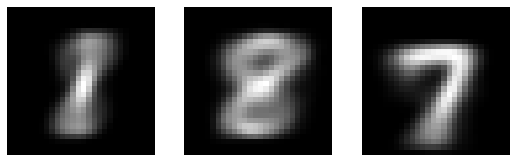

In [628]:
rows = 1
columns = 3
fig = plt.figure(figsize=(3*columns,4*rows))
for i in range(len(centers)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centers[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

### For different K

### K = 2

In [629]:
gaussian_k2 = GaussianMixture(n_components = 2, covariance_type = 'diag').fit(x_digits)

In [630]:
centers = gaussian_k2.means_
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### We recover here, quite the same issue as in the Kmeans with K = 2. It's difficult to identify the centroids and it clearly looks like some of the samples not belonging to the same class have been put together. 

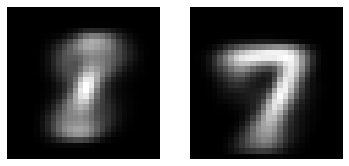

In [631]:
rows = 1
columns = 2
fig = plt.figure(figsize=(3*columns,4*rows))
for i in range(len(centers)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centers[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

### K = 4

In [632]:
gaussian_k4 = GaussianMixture(n_components = 4, covariance_type = 'diag').fit(x_digits)

In [633]:
centers = gaussian_k4.means_
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### We have an "extra class" here. Looks like the same centroid has been duplicated. So above 3 components, the GMM does not perform well. 

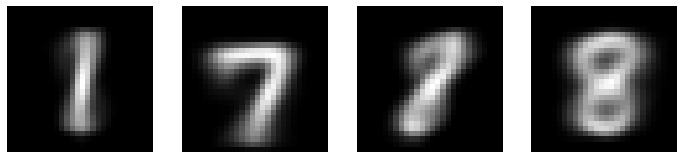

In [634]:
rows = 1
columns = 4
fig = plt.figure(figsize=(3*columns,4*rows))
for i in range(len(centers)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centers[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

#### For different shapes of the covariance

#### Spherical

In [635]:
gaussian_sphe = GaussianMixture(n_components = 3, covariance_type = 'spherical').fit(x_digits)

In [636]:
centers = gaussian_sphe.means_
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

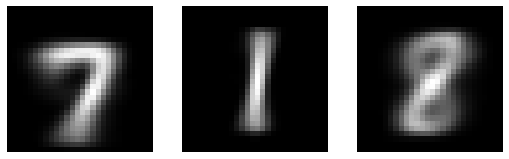

In [637]:
rows = 1
columns = 4
fig = plt.figure(figsize=(3*columns,4*rows))
for i in range(len(centers)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centers[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

#### Tied

In [638]:
gaussian_tied = GaussianMixture(n_components = 3, covariance_type = 'tied').fit(x_digits)

In [639]:
centers = gaussian_tied.means_
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

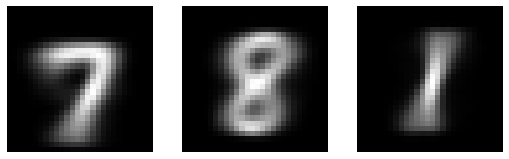

In [640]:
rows = 1
columns = 4
fig = plt.figure(figsize=(3*columns,4*rows))
for i in range(len(centers)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centers[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

#### Full

In [641]:
gaussian_full = GaussianMixture(n_components = 3, covariance_type = 'full').fit(x_digits)

In [642]:
centers = gaussian_full.means_
centers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

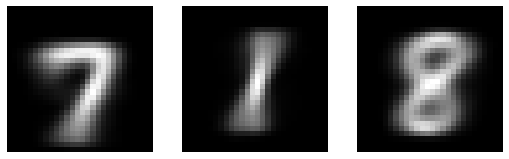

In [643]:
rows = 1
columns = 4
fig = plt.figure(figsize=(3*columns,4*rows))
for i in range(len(centers)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(centers[i].reshape(28,28), cmap = 'gray')
    plt.axis('off')

### Samples with the smallest score

In [644]:
score = gaussian.score_samples(x_digits)

#### These samples are outliers because they were not well not written. The second one for example, it's difficult to tell if it's a 7 or a 1, same for the fifth one. The eighth outlier could be one because the number is written as in frech, or English people do not put the horizontal bar on it, so that could be an explanation.  

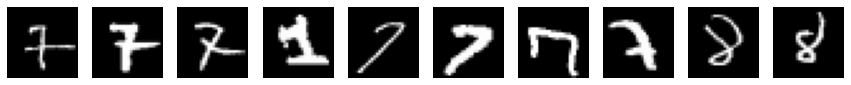

In [645]:
idx = np.argpartition(score, 10)
score_idx = idx[:10] 
rows = 1
columns = 10
fig = plt.figure(figsize=(1.5*columns,2*rows))
for i in range(len(score_idx)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(x_digits[score_idx[i]].reshape(28,28), cmap = 'gray')
    plt.axis('off')

### Prediction

In [646]:
pred = gaussian.predict(x_digits)

#### We have many points which have been wrong classified here. 

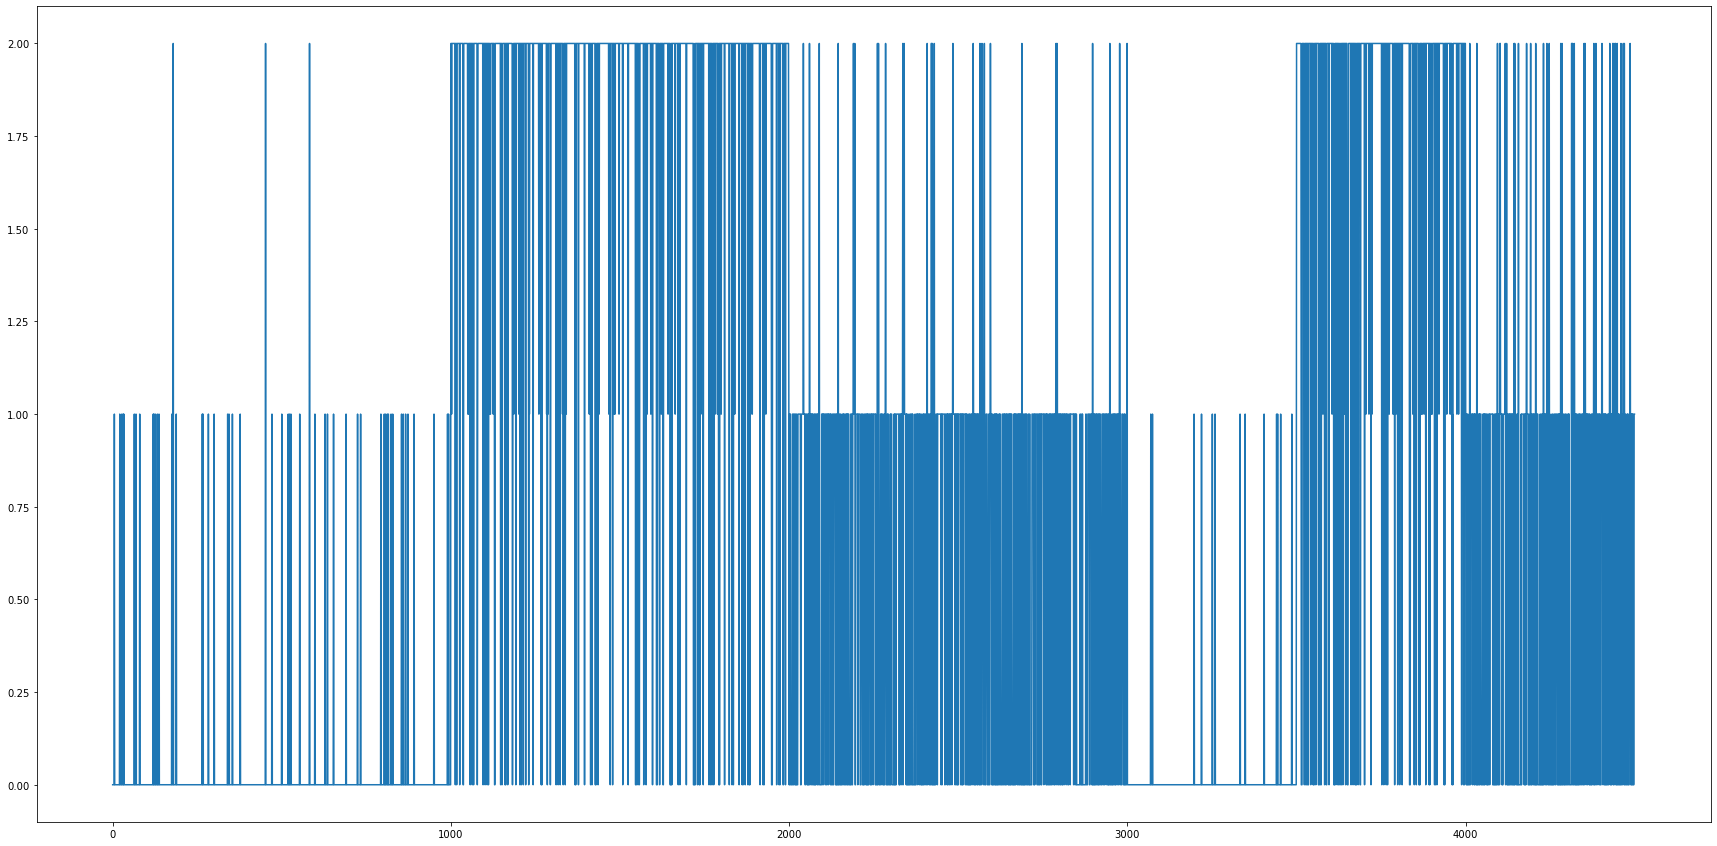

In [647]:
plt.figure(figsize = (30, 15))
x = np.arange(len(x_digits))
plt.plot(x, pred)

In [648]:
pred_list = pred.tolist()

In [649]:
score = rand_score(pred_list, y_digits_list)
score

0.7447232224444938

In [650]:
adjusted_score  = adjusted_rand_score(pred_list, y_digits_list)
adjusted_score

0.4454052846519002

    #### Score when using another shape for the covariance( Full for example)

In [651]:
pred = gaussian_full.predict(x_digits)
pred_list = pred.tolist()

#### The rand score is basically the same, but the adjusted rand score has considerably increased. 

In [652]:
score_tied = rand_score(pred_list, y_digits_list)
score

0.7447232224444938

In [653]:
adjusted_score  = adjusted_rand_score(pred_list, y_digits_list)
adjusted_score

0.7144623024693348

### We generate samples


In [654]:
samples = gaussian.sample(400)

In [655]:
liste = samples[1].tolist()

#### It's quite easy to differenciate the generated samples from the real samples. But we can still a little bit see the classes represented in the new samples. Let's try to generate new samples using another shape for the covariance( Full shape for instance). 

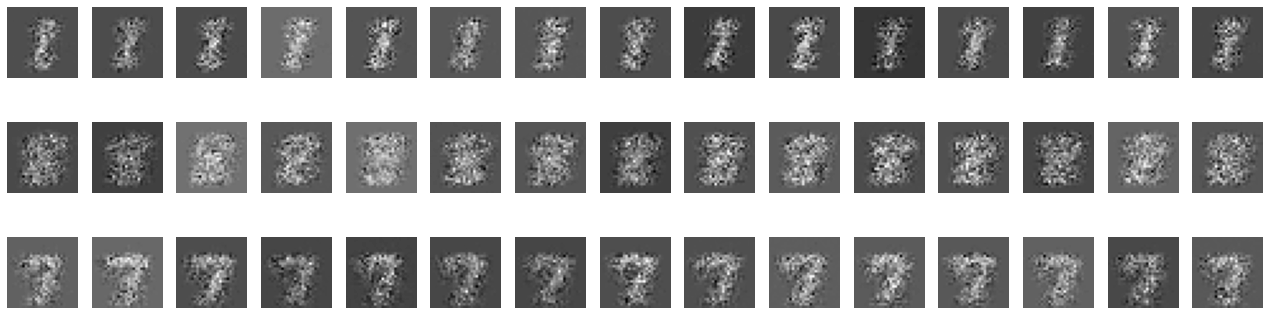

In [656]:
x = np.arange(liste.index(0), liste.index(0) + 15).tolist() + np.arange(liste.index(1), liste.index(1) + 15).tolist() + np.arange(liste.index(2), liste.index(2) + 15).tolist()
rows = 3
columns = 15
j = 1
fig = plt.figure(figsize=(1.5*columns,2*rows))
for i in x:
    fig.add_subplot(rows, columns, j)
    plt.imshow(samples[0][i].reshape(28,28), cmap = 'gray')
    plt.axis('off')
    j = j + 1

In [657]:
samples = gaussian_full.sample(400)

In [658]:
liste = samples[1].tolist()

#### We could still differentiate them, but this time the generated samples look more like the real samples. 

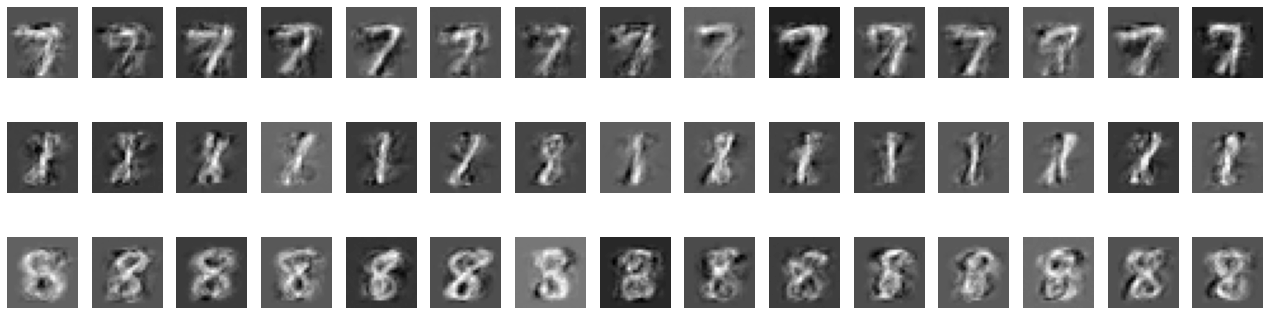

In [659]:
x = np.arange(liste.index(0), liste.index(0) + 15).tolist() + np.arange(liste.index(1), liste.index(1) + 15).tolist() + np.arange(liste.index(2), liste.index(2) + 15).tolist()
rows = 3
columns = 15
j = 1
fig = plt.figure(figsize=(1.5*columns,2*rows))
for i in x:
    fig.add_subplot(rows, columns, j)
    plt.imshow(samples[0][i].reshape(28,28), cmap = 'gray')
    plt.axis('off')
    j = j + 1

#### Proposition of an explanation: We know that normally, we use diagonal shape in high dimension. In this case, it's still good because we have obtained our 3 classes, but maybe the shape of the centroid is slightly weird because when we consider the diagonal matrix, we consider that all the features are not correlated, which create some issues in very high dimension(especially when there are may correlations between the variables) 

### 4/ Dimensinality reduction

#### Covariance matrix

In [660]:
covar = np.cov(x_digits.T)

#### Here, we can see correlations between the colors. We haev strong correlations near the diagonal and much less on the edges.

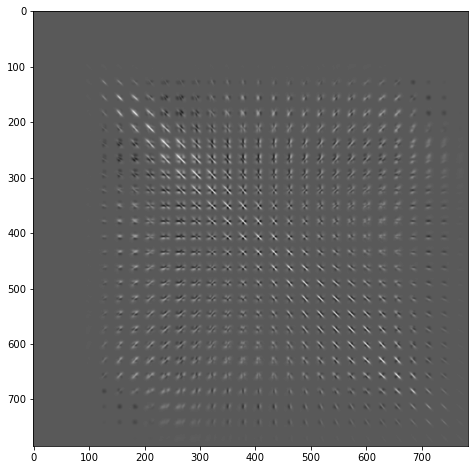

In [661]:
plt.figure(figsize = (10, 8))
plt.imshow(covar, cmap = 'gray')

#### 2/ PCA

In [683]:
pca = PCA(n_components=None).fit(x_digits)

In [663]:
variance_ratio = pca.explained_variance_ratio_

#### In 2 dimensions, we would only keep about 20% of the information

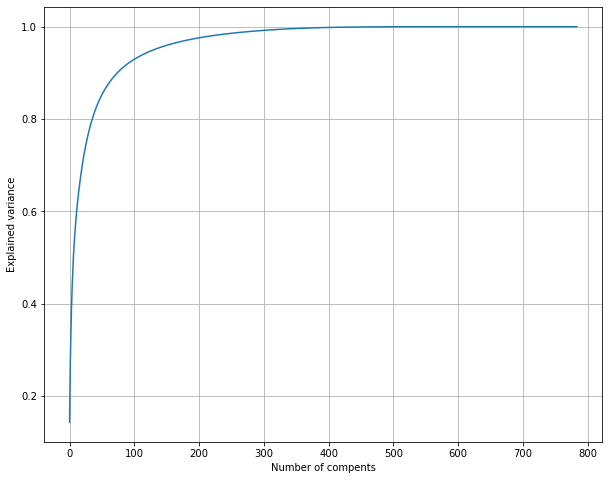

In [664]:
plt.figure(figsize = (10, 8))
x = np.arange(len(variance_ratio))
plt.plot(x, variance_ratio.cumsum())
plt.xlabel("Number of compents")
plt.ylabel("Explained variance")
plt.grid()

#### So here, we can see that a part of the samples belonging to the class "1" is present in the green(class "7")(and also in the class "8"), and those points are impossible to classify without overfitting. Since 1 and 7 can be mixed up if they are not well written, this is not surprising.  

In [684]:
transform = pca.transform(x_digits)

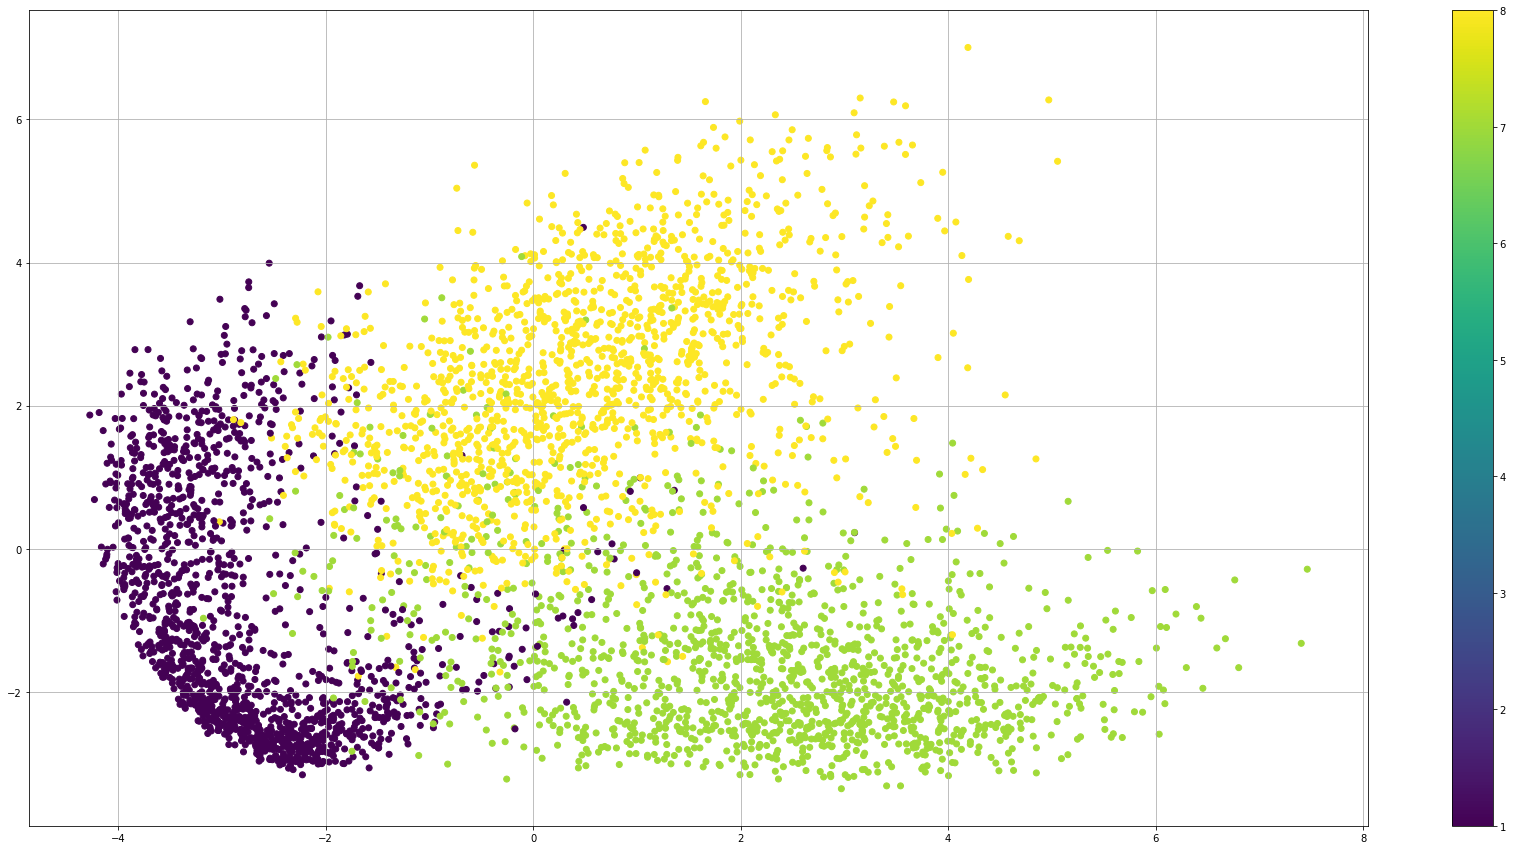

In [707]:
plt.figure(figsize = (30, 15))
plt.scatter(transform[:,0], transform[:,1], c = y_digits)
plt.grid()
plt.colorbar()
plt.show()

#### 4/ Two first principal directions

In [738]:
pca = PCA(n_components=2).fit(x_digits)

In [668]:
components = pca.components_

#### It's difficult to express what the components really represent since we don't have a lot of information preserved. 

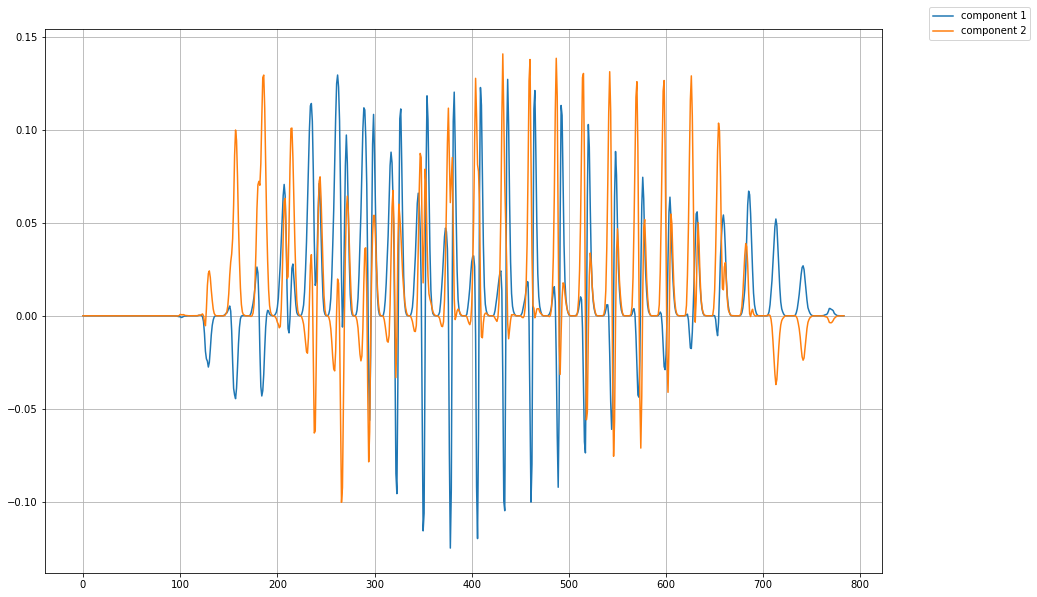

In [739]:
plt.figure(figsize = (15, 10))
for i in range(len(components)):
    plt.plot(np.arange(len(components[i])), components[i])
plt.legend((['component 1', 'component 2']), loc = "upper left", bbox_to_anchor = (1.05, 1.05))
plt.grid()

In [670]:
transform = pca.transform(x_digits)

In [671]:
x_digits_new = pca.inverse_transform(transform)

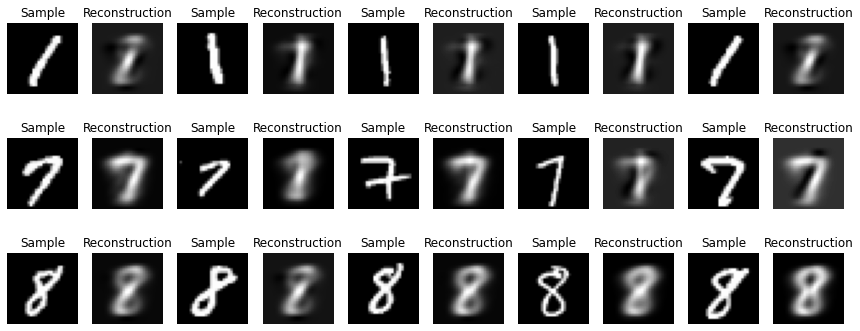

In [672]:
liste = np.arange(list(y_digits).index(1), list(y_digits).index(1) + 5).tolist() + np.arange(list(y_digits).index(7), list(y_digits).index(7) + 5).tolist() + np.arange(list(y_digits).index(8), list(y_digits).index(8) + 5).tolist()
rows = 3
columns = 10
fig = plt.figure(figsize=(1.5*columns,2*rows))
j = 1
for i in liste:
    fig.add_subplot(rows, columns, j)
    plt.imshow(x_digits[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title('Sample')
    j = j + 1
    fig.add_subplot(rows, columns, j)
    plt.imshow(x_digits_new[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title('Reconstruction')
    j = j + 1

### we take another p( we take p = 30 for which we should retrieve more than 60% of the information)

In [708]:
pca = PCA(n_components=30).fit(x_digits)
transform = pca.transform(x_digits)
x_digits_new = pca.inverse_transform(transform)

#### So here, the bigger P is( the more information we conserve), and the  more our reconstructed samples look like the original ones.
#### PS : There's no need to go beyond p = 200 for which you should retrieve all the information. 

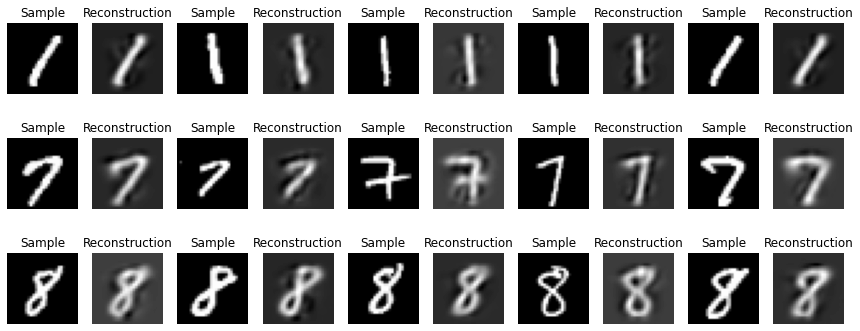

In [709]:
liste = np.arange(list(y_digits).index(1), list(y_digits).index(1) + 5).tolist() + np.arange(list(y_digits).index(7), list(y_digits).index(7) + 5).tolist() + np.arange(list(y_digits).index(8), list(y_digits).index(8) + 5).tolist()
rows = 3
columns = 10
fig = plt.figure(figsize=(1.5*columns,2*rows))
j = 1
for i in liste:
    fig.add_subplot(rows, columns, j)
    plt.imshow(x_digits[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title('Sample')
    j = j + 1
    fig.add_subplot(rows, columns, j)
    plt.imshow(x_digits_new[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title('Reconstruction')
    j = j + 1

#### 5/ NMF

In [673]:
model_nmf = NMF(n_components=2, init = 'random')

In [674]:
transform_nmf = model_nmf.fit_transform(x_digits)

In [675]:
reconstruct_nmf = model_nmf.inverse_transform(transform_nmf)

#### Basically looks the same as the pca for 2 components. 

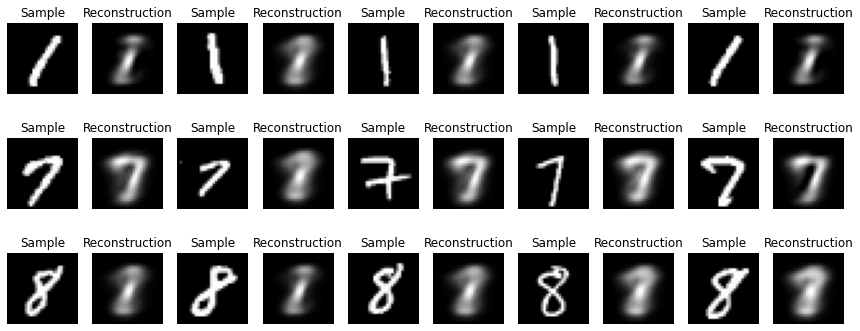

In [676]:
liste = np.arange(list(y_digits).index(1), list(y_digits).index(1) + 5).tolist() + np.arange(list(y_digits).index(7), list(y_digits).index(7) + 5).tolist() + np.arange(list(y_digits).index(8), list(y_digits).index(8) + 5).tolist()
rows = 3
columns = 10
fig = plt.figure(figsize=(1.5*columns,2*rows))
j = 1
for i in liste:
    fig.add_subplot(rows, columns, j)
    plt.imshow(x_digits[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title('Sample')
    j = j + 1
    fig.add_subplot(rows, columns, j)
    plt.imshow(reconstruct_nmf[i].reshape(28, 28), cmap = 'gray')
    plt.axis('off')
    plt.title('Reconstruction')
    j = j + 1

## 4.2/ Manifold Learning

#### A 784-dimensional data projected by T-SNE into 2-D data

In [713]:
x_digits_embedded = TSNE(n_components=2).fit_transform(x_digits)

In [714]:
x_digits_embedded

array([[ -0.9077869, -14.785459 ],
       [ 18.305752 ,  65.82356  ],
       [ -3.423789 ,  70.02579  ],
       ...,
       [ 31.694305 , -27.469969 ],
       [ 39.2503   , -15.230596 ],
       [ 55.622272 , -31.09667  ]], dtype=float32)

#### The embedding here is more discriminant than the PCA. The classes are more isolated in this case. 

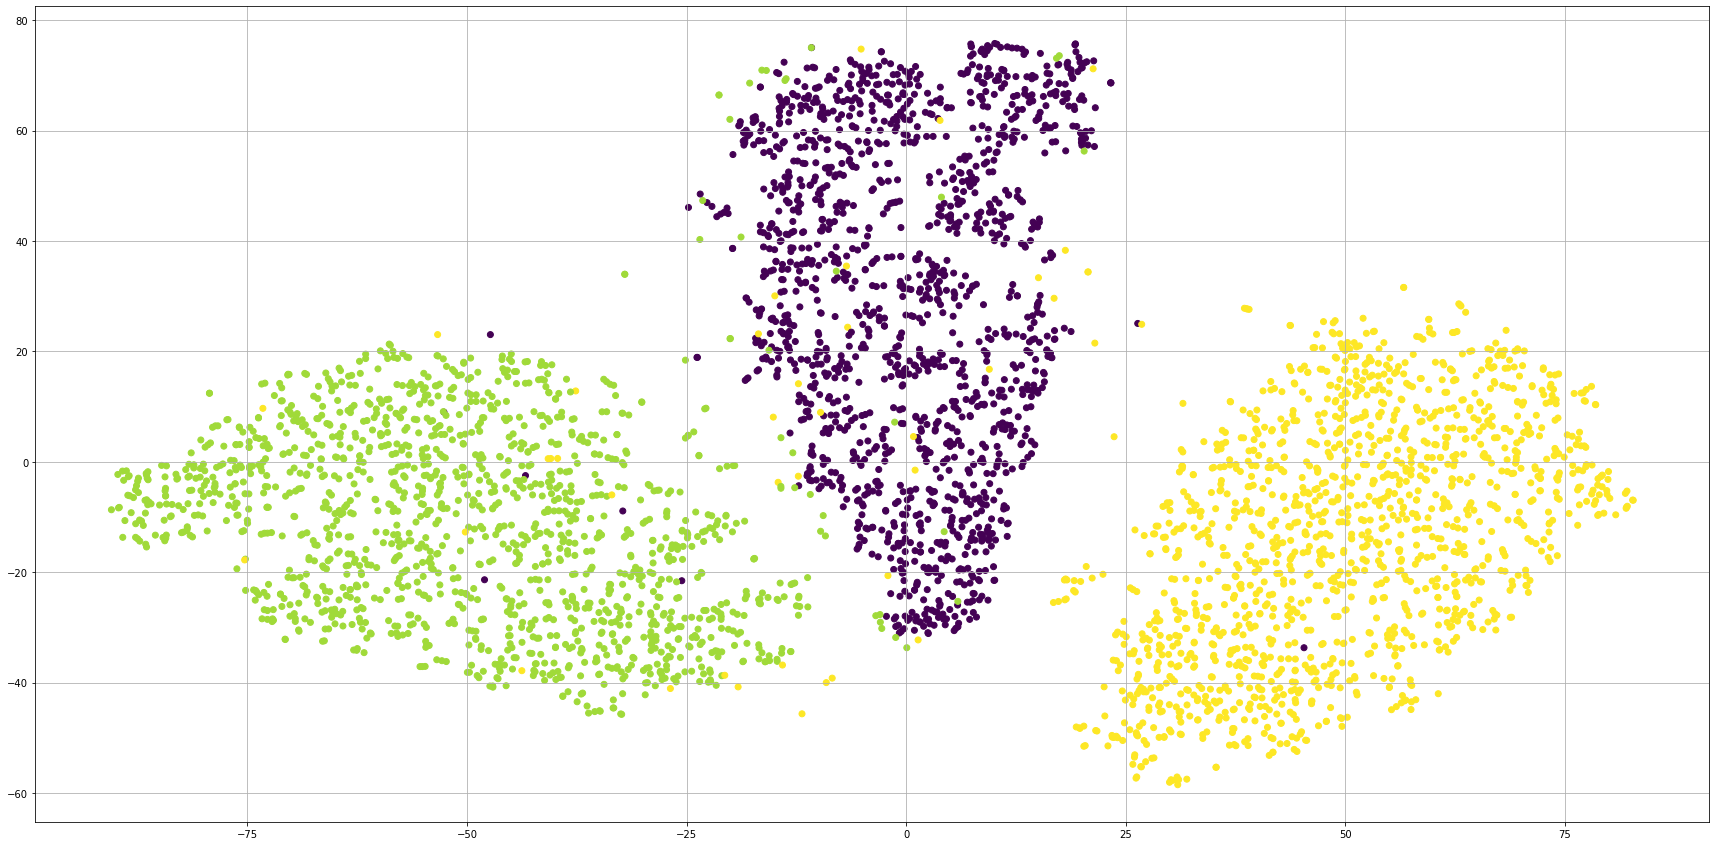

In [715]:
plt.figure(figsize = (30, 15))
plt.scatter(x_digits_embedded[:,0], x_digits_embedded[:,1], c = y_digits)
plt.grid()

#### We change the perplexity

#### when perplexity is small, then only neighborhood point distance preserve in low dimension space.

In [719]:
x_digits_embedded = TSNE(n_components=2, perplexity = 10.0).fit_transform(x_digits)

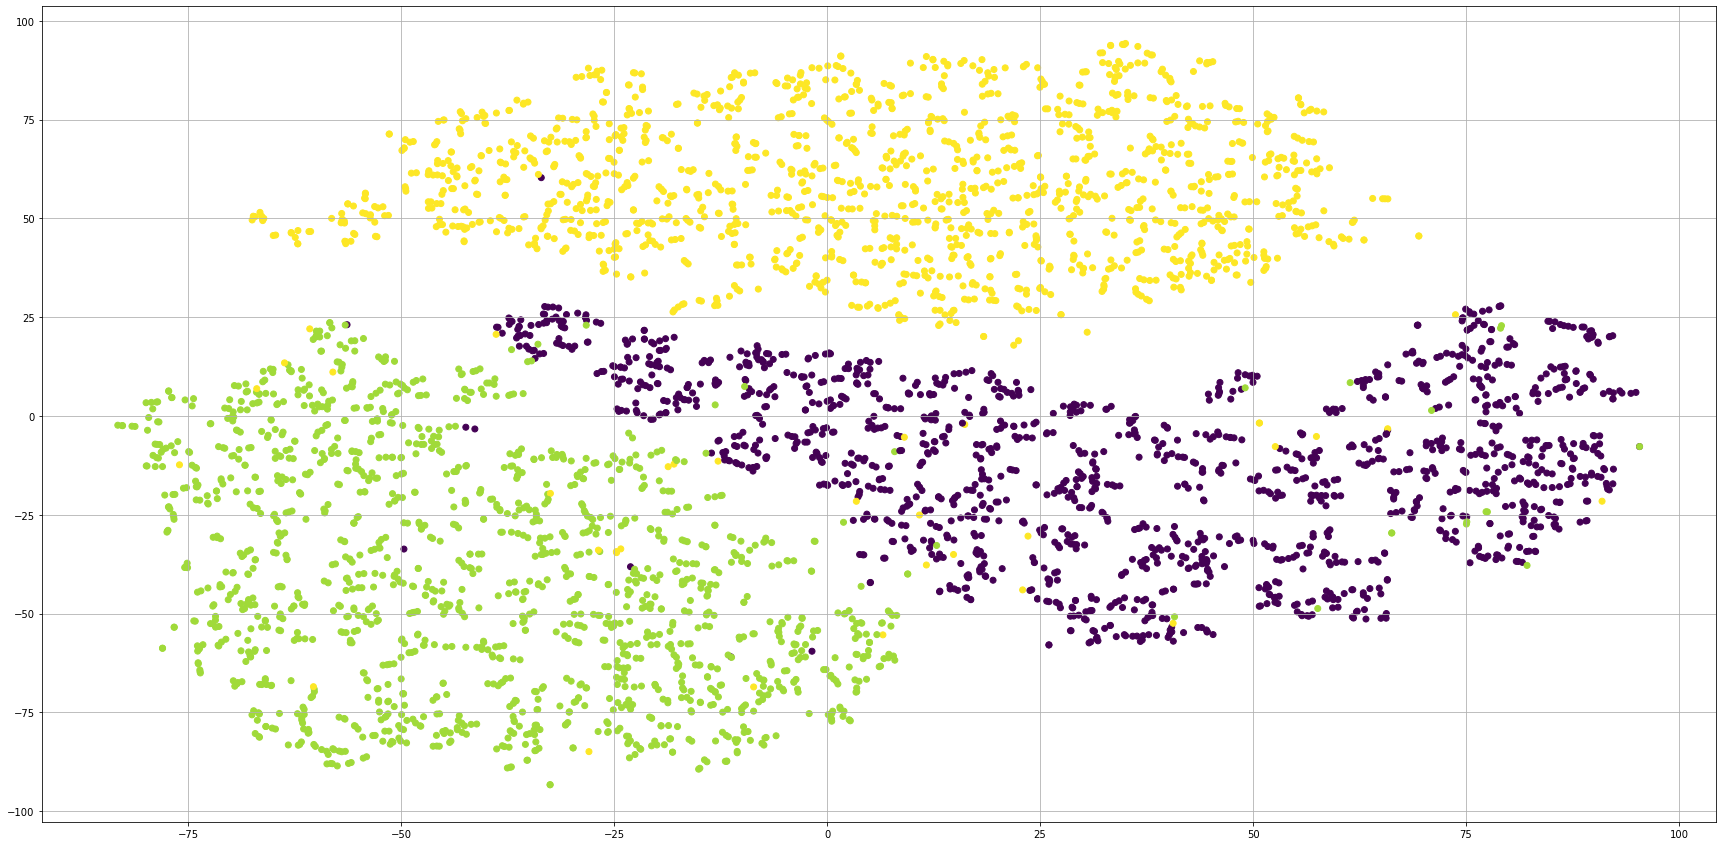

In [720]:
plt.figure(figsize = (30, 15))
plt.scatter(x_digits_embedded[:,0], x_digits_embedded[:,1], c = y_digits)
plt.grid()

#### T-SNE gives a good result with a high dataset. 
#### To go further, we could try a range of perplexity and rerun many times before making the final conclusion. 

##### Thanks for reading!